# How does school business model affect student success?
* I examined the relationship between a school's business model and student success.
* A school's business model refers to the ownership structure of the school.
* There are three primary categories of school business model:
    1. Private For Profit, e.g. University of Phoenix
    2. Private Non Profit, e.g. Rice University
    3. Public, e.g. University of Texas
* I chose two metrics of student success:
    1. Completion rate within 6 years.
    2. Median Earnings 10 years after Entry.
* This information would be helpful for prospective students and their parents deciding between schools of business models. e.g. University of Chicago vs. University of Illinois

## Key Takeways:
* Students at private nonprofit schools complete their studies within 6 years at a far higher rate than students at private for-profit and public schools.
* Graduates of private nonprofit schools also report far higher median earnings after 10 years of entry than their counterparts at the other 2 types of schools.
* While private nonprofit graduates outperform in earnings, there are outperforming outliers even within this group.
    * Overperformers are concentrated in the Northeast
    * Underperformers are concentrated in the Puerto Rico

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from scipy import stats
from pprint import pprint

%matplotlib notebook

In [2]:
# Read in CSV data.
schoolDF = pd.read_csv('school_data.csv')

In [3]:
# Count non-null values.
schoolDF.count()

Unnamed: 0                                          1000
Name                                                1000
City                                                1000
State                                               1000
School Ownership                                    1000
Number of Undergraduate Students                    1000
Share of Female Students                             986
Share of Male Students                               986
Share of Undergraduates Aged 25 and Above           1000
Average Age of Entry                                 993
Admission Rate                                       860
Completion Rate                                      991
Median Earnings of Students 10 Years After Entry     972
Median Debt for Students Who Have Completed          990
Share of Students Who Received a Federal Loan        990
Median Family Income                                 993
Average Cost of Attendance                           989
Average Faculty Salary         

## School business model vs. Earnings
## Data Prep: Create new DataFrame
* Creating new DF's.
* Check value counts of the columns we're interested in.
* Drop rows with missing values.

In [4]:
ownership_earnings_DF = schoolDF[['Name','School Ownership', 'Median Earnings of Students 10 Years After Entry']]

In [5]:
ownership_earnings_DF.count()

Name                                                1000
School Ownership                                    1000
Median Earnings of Students 10 Years After Entry     972
dtype: int64

In [6]:
ownership_earnings_DF = ownership_earnings_DF.dropna()
ownership_earnings_DF.count()

Name                                                972
School Ownership                                    972
Median Earnings of Students 10 Years After Entry    972
dtype: int64

In [7]:
ownership_earnings_DF.head()

,Name,School Ownership,Median Earnings of Students 10 Years After Entry
0,University of Phoenix-Arizona,3,47100.0
1,Southern New Hampshire University,2,45400.0
2,University of Central Florida,1,45400.0
3,Texas A & M University-College Station,1,58000.0
4,Miami Dade College,1,31100.0


In [8]:
# Create dictionary to map integer values to school ownership type categories.
school_ownership_dict = {1: "Public",
                         2: "Private nonprofit",
                         3: "Private for-profit"
                        }

In [9]:
# Replace DataFrame column and use map() method to map School Ownership code to category string values.
ownership_earnings_DF['School Ownership'] = ownership_earnings_DF['School Ownership'].map(school_ownership_dict)

In [10]:
ownership_earnings_DF.head()

,Name,School Ownership,Median Earnings of Students 10 Years After Entry
0,University of Phoenix-Arizona,Private for-profit,47100.0
1,Southern New Hampshire University,Private nonprofit,45400.0
2,University of Central Florida,Public,45400.0
3,Texas A & M University-College Station,Public,58000.0
4,Miami Dade College,Public,31100.0


## Bar Chart 1: What type of school produces graduates with the highest average median earnings 10 years after entry?

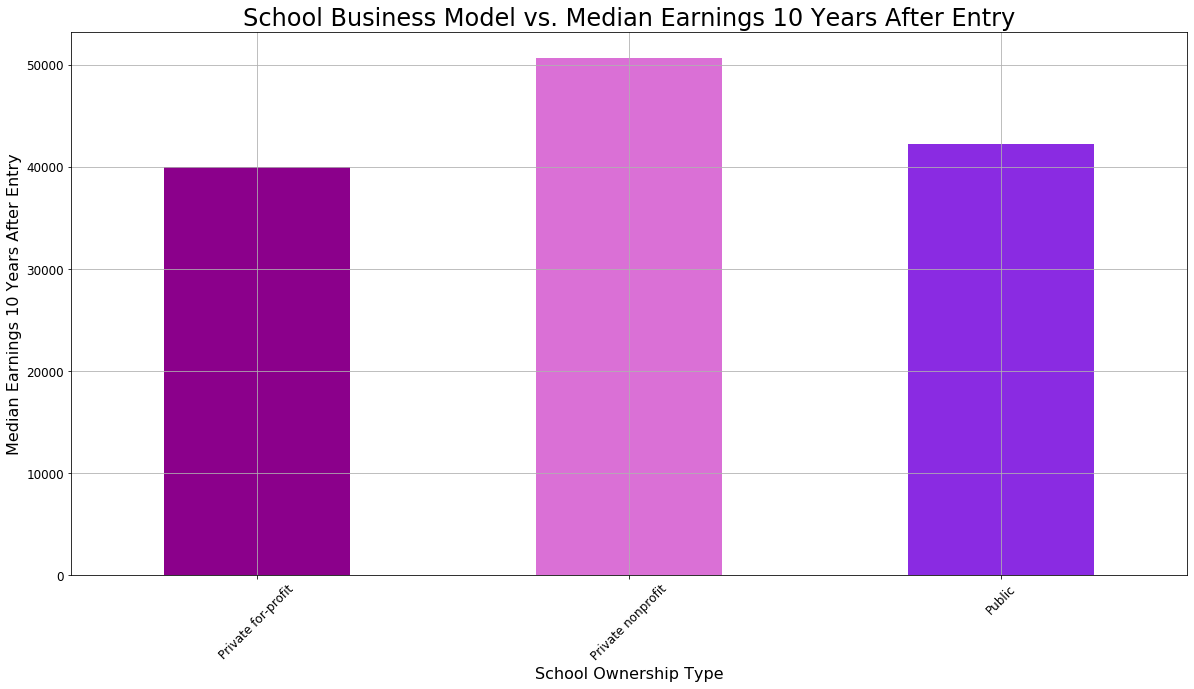

In [11]:
# create bar cahrt
ownership_earnings_DF_bar = ownership_earnings_DF.groupby('School Ownership')['Median Earnings of Students 10 Years After Entry'].mean()
bar1 = ownership_earnings_DF_bar.plot.bar(rot=45, color=['darkmagenta', 'orchid', 'blueviolet'], fontsize=12,
                                         figsize=(20,10))
bar1.set_xlabel('School Ownership Type', fontsize=16)
bar1.set_ylabel('Median Earnings 10 Years After Entry', fontsize=16)
bar1.set_title("School Business Model vs. Median Earnings 10 Years After Entry", fontsize=24)
bar1.grid()
plt.savefig('jadd_ownership_vs_earnings_bar_chart.png')
plt.show()

## Key takeaway: Private nonprofit graduates make more money.

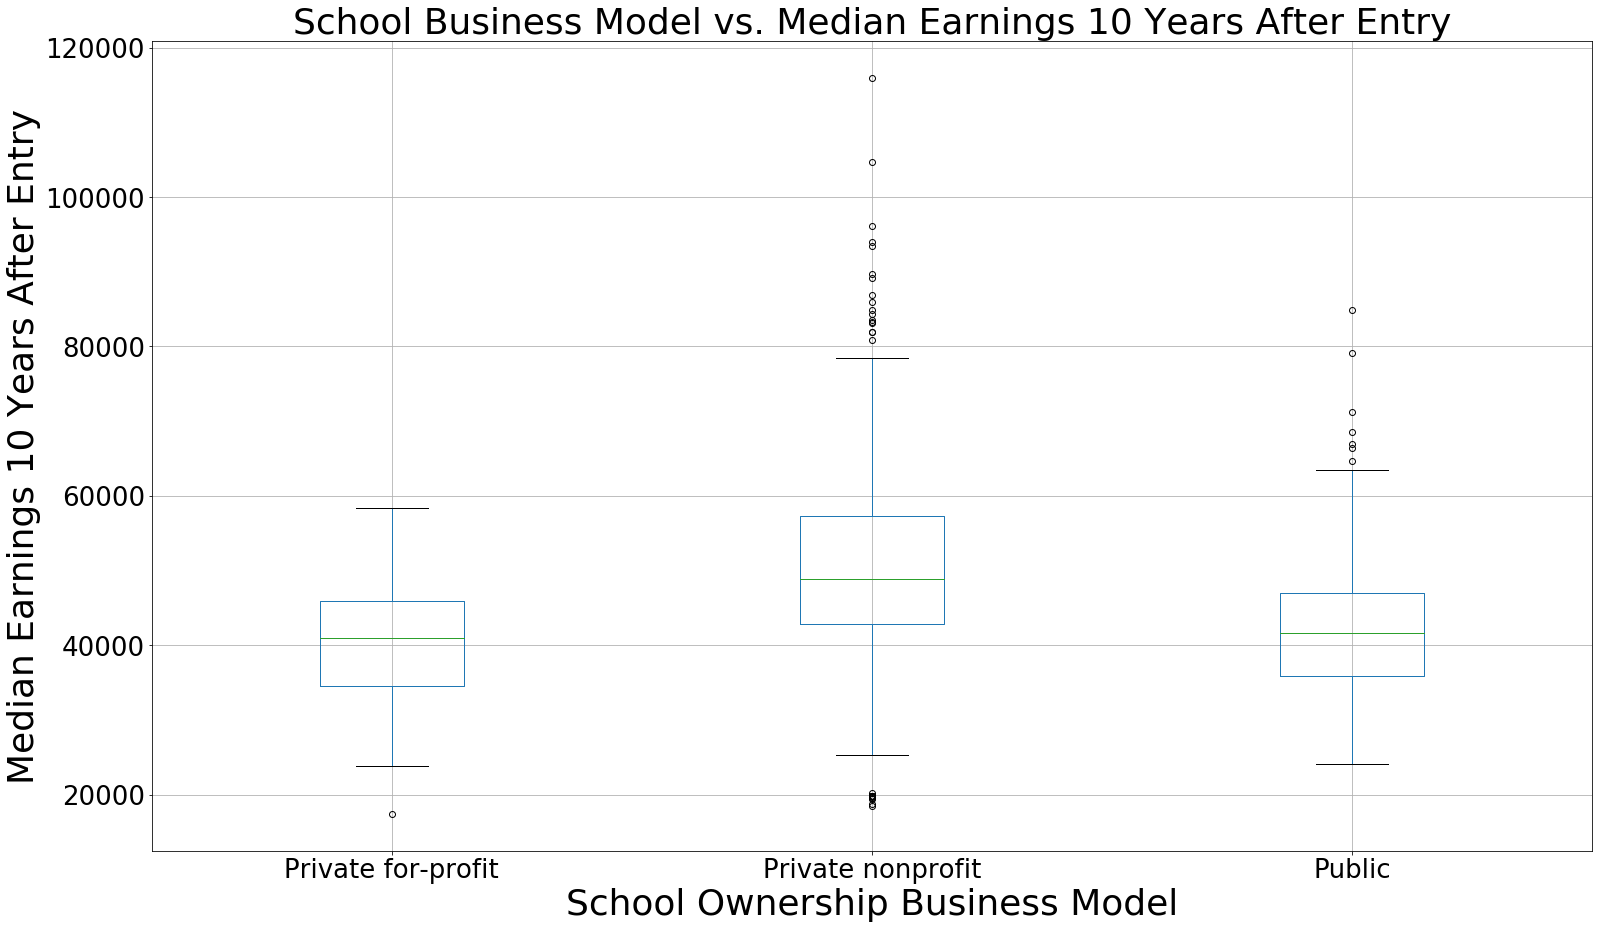

In [12]:
# Create boxplot to visualize distribution, quartiles and outliers.

bplot1 = ownership_earnings_DF.boxplot(by='School Ownership', column='Median Earnings of Students 10 Years After Entry', figsize=(25,15))
plt.suptitle("")
bplot1.set_title('School Business Model vs. Median Earnings 10 Years After Entry', fontsize=36)
bplot1.set_xlabel('School Ownership Business Model', fontsize=36)
bplot1.set_ylabel('Median Earnings 10 Years After Entry', fontsize=36)
bplot1.tick_params(labelsize=26)
plt.savefig('jadd_ownership_vs_earnings_boxplot.png')
plt.show()

## Outperforming outliers
* On average, graduates of private nonprofit schools earn more. 
* But even within this outperforming category, there are outperforming outliers.
* What are these schools?

In [13]:
# Subset the dataset for the schools that produce graduates that earn over $80,000.
outperform = ownership_earnings_DF['Median Earnings of Students 10 Years After Entry'] > 80000
ownership_earnings_DF[outperform].sort_values(by='Median Earnings of Students 10 Years After Entry', ascending=False)
ownership_earnings_DF[outperform].style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')]}])

,Name,School Ownership,Median Earnings of Students 10 Years After Entry
244,University of Pennsylvania,Private nonprofit,85900
324,Columbia University in the City of New York,Private nonprofit,83300
351,Harvard University,Private nonprofit,89700
371,Georgetown University,Private nonprofit,93500
375,Stanford University,Private nonprofit,94000
408,Duke University,Private nonprofit,84400
413,Carnegie Mellon University,Private nonprofit,83600
422,Rensselaer Polytechnic Institute,Private nonprofit,82000
452,Yale University,Private nonprofit,83200
507,Lehigh University,Private nonprofit,81900


## What is the overperforming Public school?
* All but one of the overperforming schools is private nonprofit.
* What is the sole public overperforming school?

In [14]:
public_outperformers = ownership_earnings_DF[outperform]['School Ownership'] == 'Public'
ownership_earnings_DF[outperform][public_outperformers]

,Name,School Ownership,Median Earnings of Students 10 Years After Entry
530,Colorado School of Mines,Public,84900.0


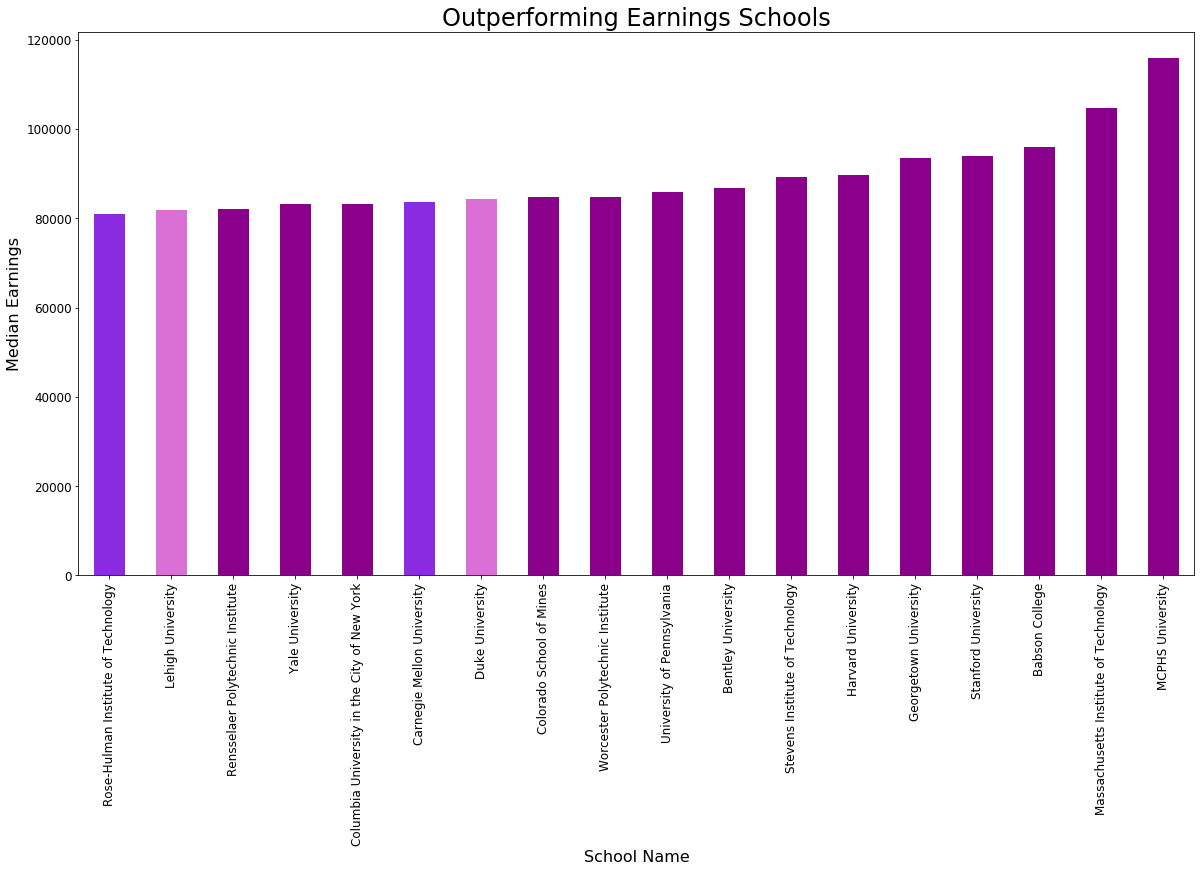

In [15]:
colors = {
    'Public': 'darkmagenta',
    'Private nonprofit': 'orchid',
    'Private for-profit': 'blueviolet'
}

colors_map = list(ownership_earnings_DF['School Ownership'].map(colors))

bar_outperform = ownership_earnings_DF[outperform].sort_values(by='Median Earnings of Students 10 Years After Entry').plot.bar(x='Name', y='Median Earnings of Students 10 Years After Entry',
                                           figsize=(20,10), fontsize=12, rot=90, color=colors_map, legend=False)

bar_outperform.set_title("Outperforming Earnings Schools", fontsize=24)
bar_outperform.set_ylabel('Median Earnings', fontsize=16)
bar_outperform.set_xlabel('School Name', fontsize=16)

plt.savefig('jadd_outperforming_earnings_schools_barchart.png')
plt.show()

# h,l = bar_outperform.get_legend_handles_labels()
# bar_outperform.legend(h[:3],["Public", "Private"], loc=2, fontsize=12)
# leg_t = bar_outperform.get_legend()
# leg_t.legendHandles[0].set_color('darkmagenta')b
# leg_t.legendHandles[0]._sizes = [30]
# leg_t.legendHandles[1].set_color('orchid')
# leg_t.legendHandles[1]._sizes = [30]b
# leg_t.legendHandles[2].set_color('blueviolet')
# leg_t.legendHandles[2]._sizes = [30]

## Where are these overperforming earnings schools?

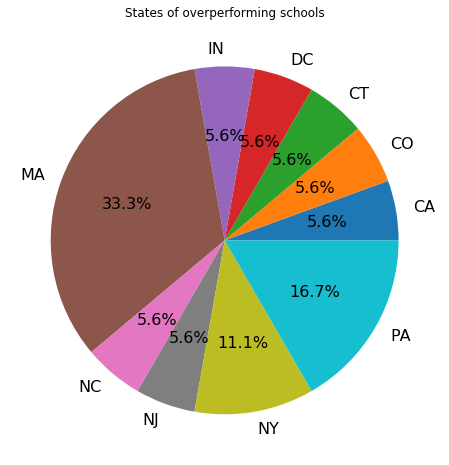

In [16]:
overperform_schools = schoolDF['Median Earnings of Students 10 Years After Entry'] > 80000
pie_overperform = schoolDF[overperform_schools].groupby('State')['Name'].nunique().plot.pie(y='State', figsize=(8,8),
                                                                                              fontsize=16,
                                                                                              title="States of overperforming schools", autopct= '%1.1f%%')
pie_overperform.set_ylabel('')

plt.savefig('jadd_overperforming_earnings_schools_states_piechart.png')
plt.show()

## Masschusetts has a one-third of overperforming schools
* Overperforming schools high-earners are distributed over 10 states.

## Underperforming outliers
* All but one of the underforming earnings schools were Private nonprofit.

In [17]:
underperform = ownership_earnings_DF['Median Earnings of Students 10 Years After Entry'] < 25000
ownership_earnings_DF[underperform].sort_values('Median Earnings of Students 10 Years After Entry', ascending=False)
ownership_earnings_DF[underperform].style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')]}])

,Name,School Ownership,Median Earnings of Students 10 Years After Entry
179,Universidad Ana G. Mendez-Gurabo Campus,Private nonprofit,19700
246,Universidad Ana G. Mendez-Cupey Campus,Private nonprofit,19400
250,National University College,Private for-profit,17400
258,Universidad Ana G. Mendez-Carolina Campus,Private nonprofit,19600
432,Inter American University of Puerto Rico-Metro,Private nonprofit,19800
497,Pontifical Catholic University of Puerto Rico-Ponce,Private nonprofit,18500
535,Inter American University of Puerto Rico-Ponce,Private nonprofit,19800
549,Inter American University of Puerto Rico-Bayamon,Private nonprofit,19800
567,Universidad del Sagrado Corazon,Private nonprofit,20200
597,Inter American University of Puerto Rico-San German,Private nonprofit,19800


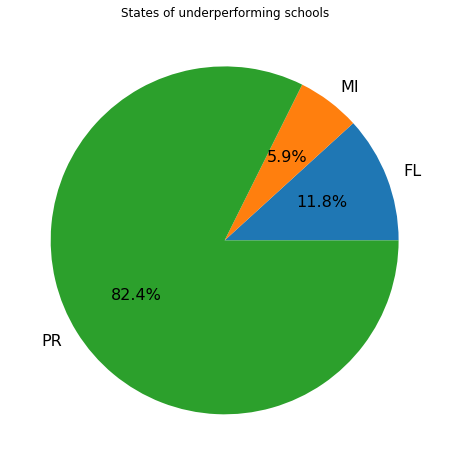

In [18]:
underperform_schools = schoolDF['Median Earnings of Students 10 Years After Entry'] < 25000
pie_underperform = schoolDF[underperform_schools].groupby('State')['Name'].nunique().plot.pie(y='State', figsize=(8,8),
                                                                                              fontsize=16,
                                                                                              title="States of underperforming schools", autopct= '%1.1f%%')
pie_underperform.set_ylabel('')

plt.savefig('jadd_underperforming_earnings_schools_states_piechart.png')
plt.show()

## Ownership type vs. Completion Rates
* What does it tell you.
*  I will plot school ownership type against completion rates.

In [19]:
ownership_completion_DF = schoolDF[['School Ownership', 'Completion Rate']]

In [20]:
ownership_completion_DF.count()

School Ownership    1000
Completion Rate      991
dtype: int64

In [21]:
ownership_completion_DF = ownership_completion_DF.dropna()
ownership_completion_DF.count()

School Ownership    991
Completion Rate     991
dtype: int64

In [22]:
ownership_completion_DF['type']= ownership_completion_DF['School Ownership'].map(school_ownership_dict)

In [23]:
ownership_completion_DF.count()

School Ownership    991
Completion Rate     991
type                991
dtype: int64

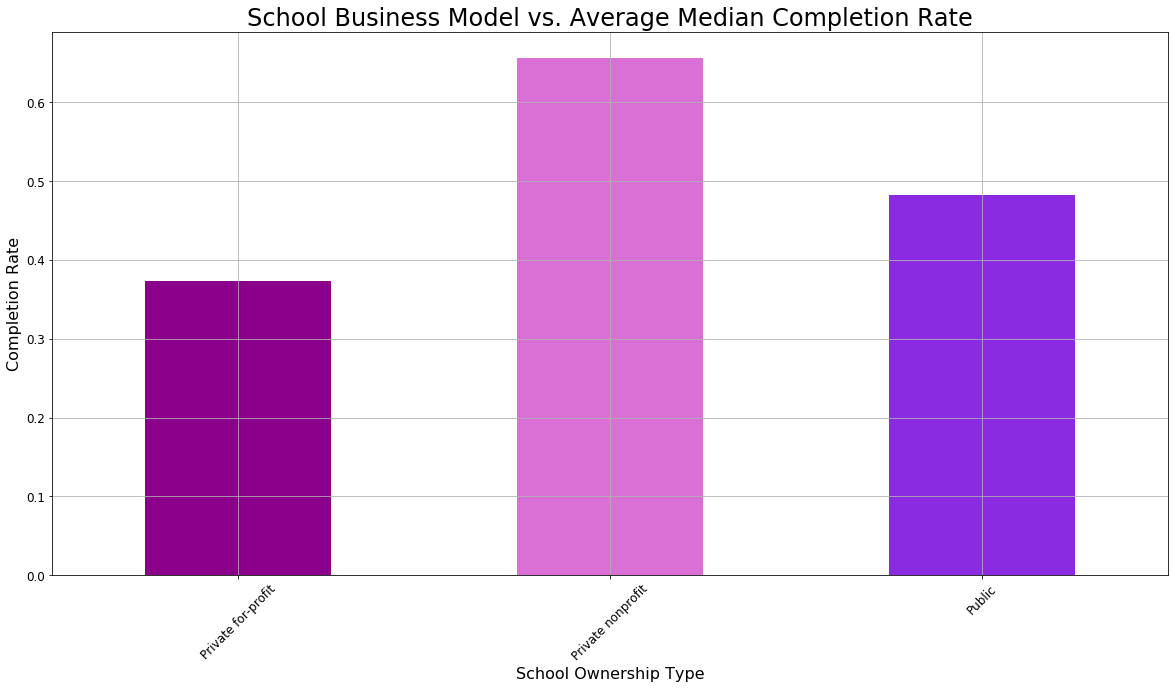

In [24]:
ownership_completion_DF_bar = ownership_completion_DF.groupby('type')['Completion Rate'].mean()
bar2 = ownership_completion_DF_bar.plot.bar(rot=45, color=['darkmagenta', 'orchid', 'blueviolet'], fontsize=12,
                                         figsize=(20,10))
plt.grid()
bar2.set_xlabel('School Ownership Type', fontsize=16)
bar2.set_ylabel('Completion Rate', fontsize=16)
bar2.set_title("School Business Model vs. Average Median Completion Rate", fontsize=24)
plt.savefig('jadd_ownership_vs_completion_bar_chart.png')
plt.show()

In [25]:
print(ownership_completion_DF_bar)

type
Private for-profit    0.373117
Private nonprofit     0.656524
Public                0.481907
Name: Completion Rate, dtype: float64


## OBSERVED TREND Completion rates are much higher at Private nonprofit schools
* Other questions.

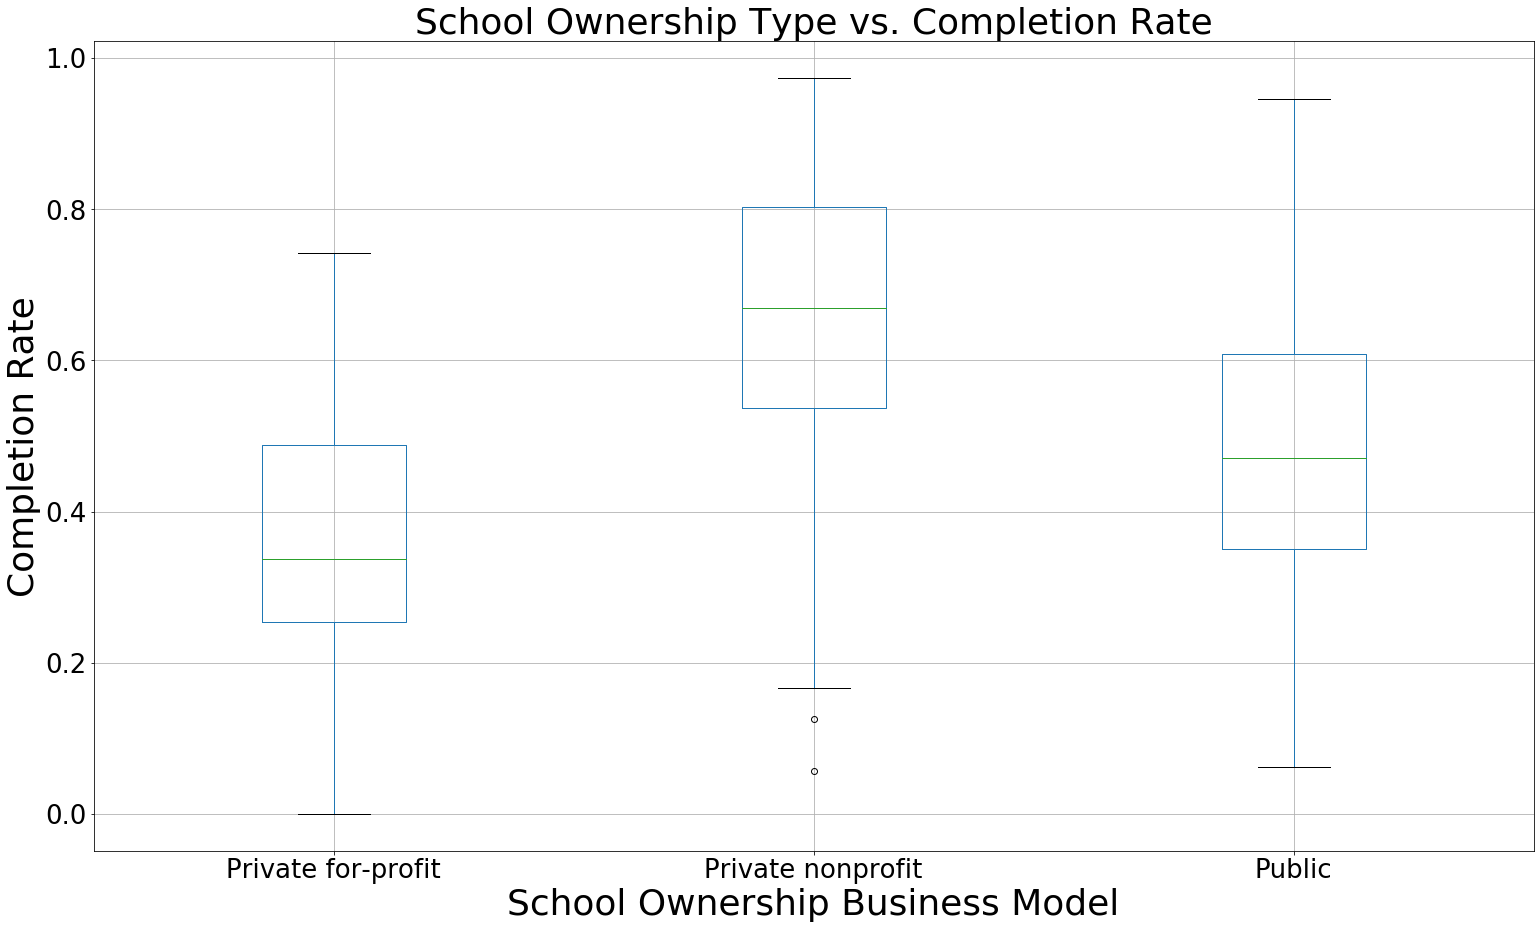

In [26]:
bplot2 = ownership_completion_DF.boxplot(by='type', column='Completion Rate', figsize=(25,15))

bplot2.set_title('School Ownership Type vs. Completion Rate', fontsize=36)
bplot2.set_xlabel('School Ownership Business Model', fontsize=36)
bplot2.set_ylabel('Completion Rate', fontsize=36)
bplot2.tick_params(labelsize=26)
plt.suptitle("")

plt.savefig('jadd_ownership_completion_boxplot.png')
plt.show()

## Who and where are the underperforming private nonprofit schools?
* There are only three outliers. Who are they?

In [27]:
# Create condition for DataFrame subset. Under 0.2 completion rate AND school is Private nonprofit.
underperform_completion = (schoolDF['Completion Rate'] < 0.2) & (schoolDF['School Ownership'] == 2)
underperform_completion_schools = schoolDF[underperform_completion][['Name', 'City','State','School Ownership','Completion Rate']]

# Re-map school categories to codes.
underperform_completion_schools['School Ownership'] = underperform_completion_schools['School Ownership'].map(school_ownership_dict)

# Hide index and highlight on hover.
underperform_completion_schools.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')]}]).hide_index()

Name,City,State,School Ownership,Completion Rate
Baker College,Flint,MI,Private nonprofit,0.1261
Bellevue University,Bellevue,NE,Private nonprofit,0.1667
Franklin University,Columbus,OH,Private nonprofit,0.0566
